## EDA: psychopathy data covariates

## Imports

In [37]:
import os
import nilearn as nil
from nilearn import plotting
import nibabel as nib
import pandas as pd
import numpy as np
import psychscripts
import matplotlib.pyplot as plt
import re
import seaborn as sns; sns.set(style='ticks', palette='pastel')
from pandas.api.types import is_numeric_dtype
import warnings; warnings.filterwarnings('ignore')
from collections import Counter
%matplotlib inline

## Observations

- 711 subjects in covariates, 888 in JHU_vbm
- lots of 0s for log10subuse, 32 unique values
- GM+WM extremely normally distributed (makes sense, given the number of unique data points)

## Look at some of the data

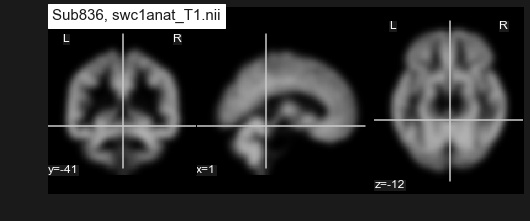

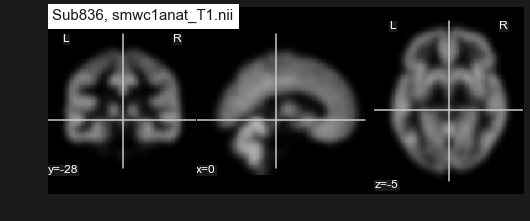

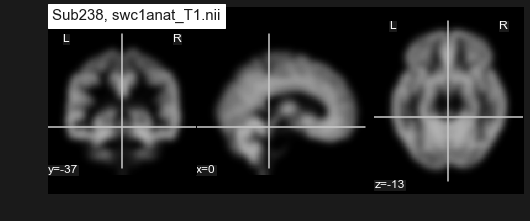

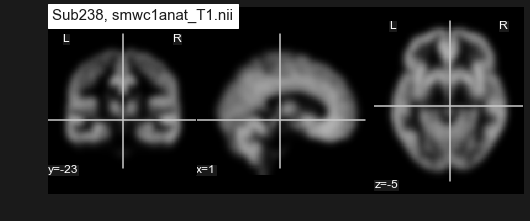

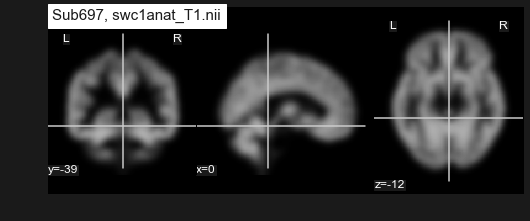

In [38]:
# look at the data
idx = 0
rgx = re.compile(r'Sub[0-9]*')
for i, j, fl in os.walk("data/JHU_VBM"):
    for eachfile in fl:
        idx += 1
        if idx > 5:
            break
        if eachfile.endswith(".nii"):
            plotting.plot_anat(os.path.join(i, eachfile), title=(', '.join([re.search(rgx, i).group(), eachfile])))
            plt.show()

## Explore as DataFrame

In [39]:
# concatenate the two tabs
df1 = pd.read_excel("data/VH_n216_vs_NV_n135_vs_VNH_n538_covariates.xlsx")
df2 = pd.read_excel('data/VH_n216_vs_NV_n135_vs_VNH_n538_covariates.xlsx', sheet_name='Test')

df = pd.concat([df1, df2]).reset_index(drop=True)

In [40]:
df.iloc[700:730, :]

,SubNum,Group,Group_Lab,Age,IQ,PCLR_Total,log10subuse,GM+WM
700,Sub701,3,H,36,94.0,30.000000,0.30,1234.816623
701,Sub702,3,H,37,111.0,17.900000,0.60,1059.081811
702,Sub703,3,H,38,77.0,18.000000,0.60,1113.315230
703,Sub704,3,H,33,111.0,17.300000,0.60,1365.723093
704,Sub705,3,H,40,111.0,33.000000,1.23,1107.976074
705,Sub706,3,H,32,106.0,25.555556,0.78,1296.841022
706,Sub707,3,H,30,77.0,13.300000,0.78,1228.652836
707,Sub708,3,H,25,103.0,24.000000,0.95,1184.852458
708,Sub709,3,H,26,100.0,19.000000,0.00,1213.173545
709,Sub710,3,H,41,97.0,24.200000,0.90,1239.307511


In [41]:
df['Group_Lab'].unique()

array(['NV', 'VNH', 'H'], dtype=object)

In [42]:
df.describe()

,Group,Age,IQ,PCLR_Total,log10subuse,GM+WM
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.091114,33.709786,97.823993,22.090721,0.707604,1194.352551
std,0.622060,8.853737,13.467422,7.095880,0.435158,106.397383
min,1.000000,18.000000,72.000000,3.200000,0.000000,884.713932
25%,2.000000,27.000000,89.000000,17.000000,0.300000,1126.019465
50%,2.000000,32.000000,97.000000,22.100000,0.780000,1190.573790
75%,2.000000,40.000000,106.000000,27.400000,1.040000,1262.775985
max,3.000000,65.000000,137.000000,40.000000,1.700000,1551.914702


### Explore Group

In [43]:
df.groupby('Group').mean()

,Age,IQ,PCLR_Total,log10subuse,GM+WM
Group,,,,,
1,32.925926,99.218741,20.785926,0.804815,1214.161293
2,34.141264,98.040892,21.874298,0.683810,1190.474475
3,33.125000,96.412037,23.445270,0.706111,1191.631367


In [44]:
df['Group_Lab'].unique()

array(['NV', 'VNH', 'H'], dtype=object)

- one-to-one mapping between 'Group' and 'Group_Lab'. {‘NV’: 1, ‘VNH’: 2, ’H’: 3}
- no immediate apparent difference between groups on any of the variables.

In [45]:
df.groupby('Group_Lab').mean()

,Group,Age,IQ,PCLR_Total,log10subuse,GM+WM
Group_Lab,,,,,,
H,3.0,33.125000,96.412037,23.445270,0.706111,1191.631367
NV,1.0,32.925926,99.218741,20.785926,0.804815,1214.161293
VNH,2.0,34.141264,98.040892,21.874298,0.683810,1190.474475


In [49]:
len(df)

889

In [50]:
df['Group_Lab'].unique()

array(['NV', 'VNH', 'H'], dtype=object)

In [48]:
# log10subuse has 36 unique values
len(df['log10subuse'].unique())

36

## Visualizations

## overview

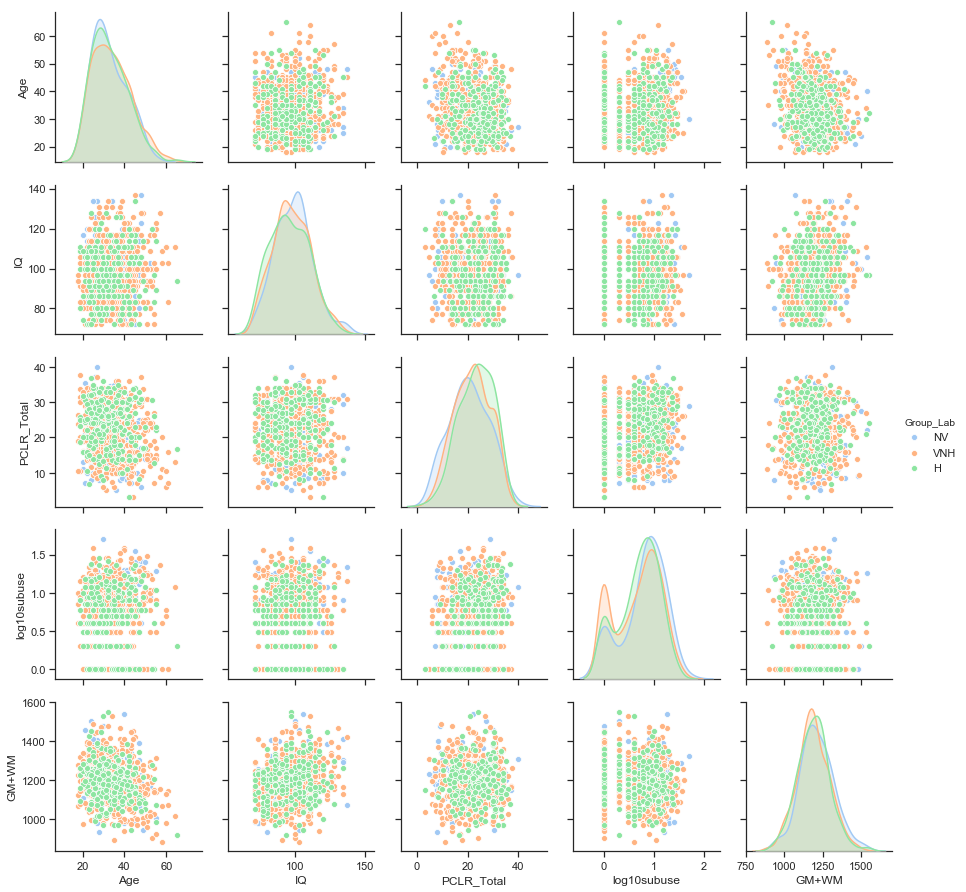

In [103]:
sns.pairplot(df[['Group_Lab', 'Age', 'IQ', 'PCLR_Total', 'log10subuse', 'GM+WM']], hue='Group_Lab');

- Somewhat negative correlation between age and GM+wm.
- Less substance abuse for violent non-homocide

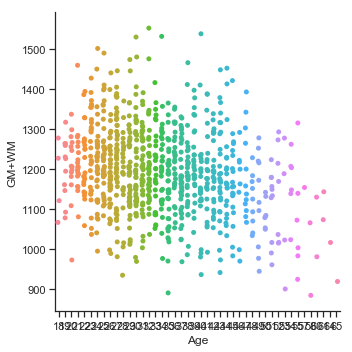

In [121]:
sns.catplot(x='Age', y='GM+WM', data=df, );

### Histograms of each variable

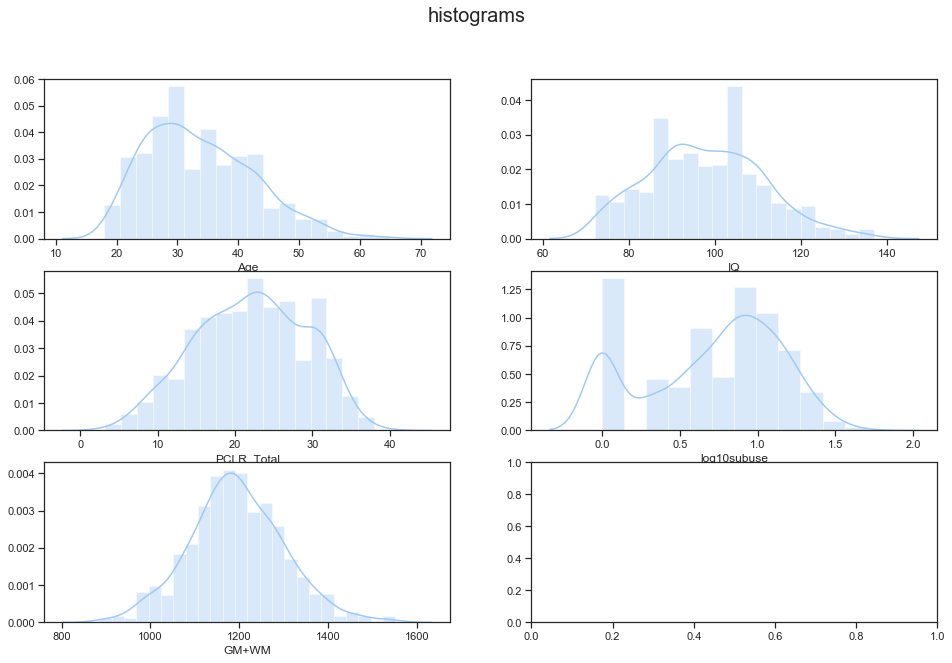

In [89]:
# histograms of the relevant variables
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
for axi, var in zip(axes.flat, df[['Age', 'IQ', 'PCLR_Total', 'log10subuse', 'GM+WM']]):
    # plot and title
    sns.distplot(df[var], ax=axi)
fig.suptitle('histograms', fontsize=20);

- GM+WM is extremely normally distributed (makes sense)
- log10subuse doesn't have many unique values (is it measured from a survey with discrete values?) and spikes at 0 (makes sense)
- IQ has a weird spike a bit above 100

In [90]:
df.head()

,SubNum,Group,Group_Lab,Age,IQ,PCLR_Total,log10subuse,GM+WM
0,Sub001,1,NV,21,103.0,35.3,0.78,1201.268251
1,Sub002,1,NV,34,134.0,10.0,0.00,1301.977338
2,Sub003,1,NV,33,106.0,21.0,1.36,1164.731682
3,Sub004,1,NV,46,103.0,10.0,0.00,1199.627199
4,Sub005,1,NV,35,103.0,18.0,0.78,1316.691431


TypeError: unsupported operand type(s) for /: 'str' and 'int'

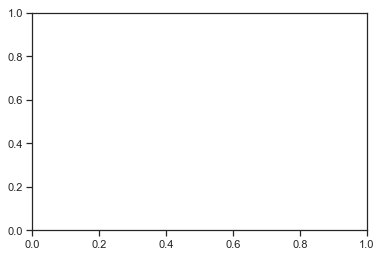

In [91]:
df.columns

# 3 distplots for axis colored by Group_Lab
sns.distplot(df['Group_Lab'])

### compare homocides to psychopathy score

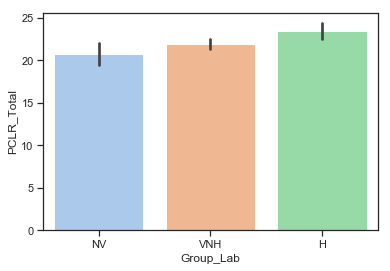

In [53]:
# compare homocides to psychopathy score
sns.barplot(x='Group_Lab', y='PCLR_Total', data=df);

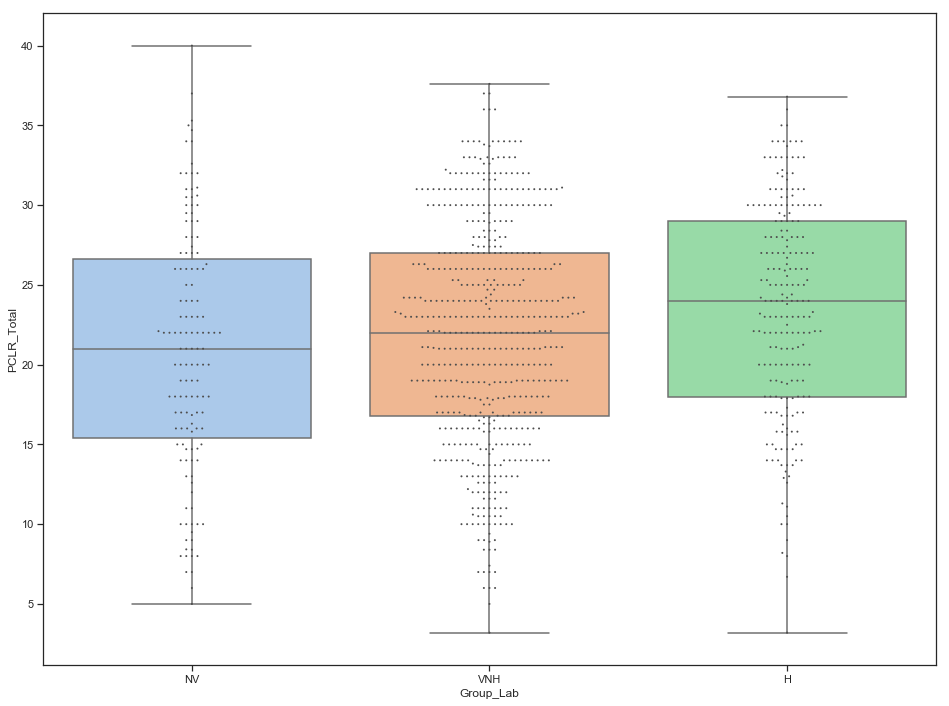

In [54]:
# compare homocides to psychopathy score
sns.boxplot(x='Group_Lab', y='PCLR_Total', data=df)
sns.swarmplot(x="Group_Lab", y="PCLR_Total", data=df,
              size=2, color=".3", linewidth=0)

fig = plt.gcf()
fig.set_size_inches(16, 12)

### look at subuse

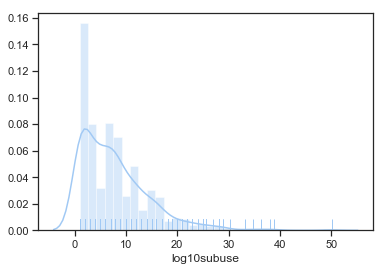

In [55]:
# tons of 0s
sns.distplot(10 ** df['log10subuse'], bins=30, rug=True);

In [56]:
# hella 0s
df['log10subuse'].value_counts()

0.00    170
0.60     68
0.90     62
0.78     60
0.85     58
0.30     57
0.48     49
0.70     46
1.08     40
0.95     40
1.00     38
1.04     31
1.18     22
1.11     22
1.15     22
1.20     21
1.23     15
1.26     10
1.28      8
1.34      8
1.36      6
1.30      6
1.45      5
1.40      5
1.41      4
1.32      4
1.46      2
1.38      2
1.59      1
1.48      1
1.52      1
1.56      1
1.43      1
1.58      1
1.54      1
1.70      1
Name: log10subuse, dtype: int64